#Pipeline for running inference and classifying pushup reps

In [1]:
import sys

sys.path.append('../data')
sys.path.append('..')
sys.path.append('../inference')
sys.path.append('../feedback')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ai_trainer import Personal_Trainer
import squat_separation as ss
import pickle
import os
import random as rnd
from collections import defaultdict
import testing_utils as tu

from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

%matplotlib inline

#Step 1: Instantiate our personal trainer and load preprocessed data

In [2]:
pt = Personal_Trainer({"pushup": 'NeckY'})
exercise = 'pushup'
pt.load_reps(exercise,os.path.join('../data/data_sets','pushupDataSet109.p'))


#Step 2: Extract features 

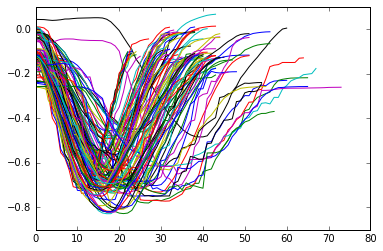

In [3]:
plt.clf()
for pushup in pt.get_reps(exercise):
    plt.plot(-pushup['NeckY'])

#Step 3: Classification

#Classification Experimentation with varying sizes of states

In [4]:
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn import naive_bayes

In [7]:
X0, Y0, file_names = pt.extract_pu_features(multiples=[0.5])

In [8]:
X00 = np.concatenate([X0[x] for x in X0],axis=1)

In [9]:
X1, Y1, file_names = pt.extract_pu_features(multiples=[0.25, 0.5, 0.75])

In [10]:
X10 = np.concatenate([X1[x] for x in X1],axis=1)

In [11]:
X15, Y15, file_names = pt.extract_pu_features(multiples=[0.2, 0.4, 0.6, 0.8])

In [12]:
X150 = np.concatenate([X15[x] for x in X15],axis=1)

In [13]:
X2, Y2, file_names = pt.extract_pu_features(multiples=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [14]:
X20 = np.concatenate([X2[x] for x in X2],axis=1)

In [5]:
X3, Y3, file_names = pt.extract_pu_features(multiples=[0.05, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])

NeckY


In [6]:
X30 = np.concatenate([X3[x] for x in X3],axis=1)

In [9]:
X4, Y4, file_names = pt.extract_pu_features(multiples=[float(x)/100 for x in range(100)])

NeckY


In [10]:
X40 = np.concatenate([X4[x] for x in X4],axis=1)

In [55]:
reg_constants = [0.5, 1, 3, 5, 10, 25, 50, 100]

#=====[ Choose Component to evaluate and proper labels ]=====
key = 'head_back'
y = Y0[key]

#=====[ Choose X to utilize from above. Accessing the key of an X gives only the feature set specific to the component, key ]=====
X=X40

for c in reg_constants:
    
    print '\n\nConstant =', c, '\n######################################\n\n'
    print 'Logistic Regression with L1'
    tu.rnd_prediction(X, y, file_names, linear_model.LogisticRegression, penalty='l1',C=c)
    print 'Logistic Regression with L2'
    tu.rnd_prediction(X, y, file_names, linear_model.LogisticRegression, penalty='l2', C=c)
    
#=====[ Run inference with a number of desired classifiers for testing ]=====
# print '\n\n', key, '\n######################################\n\n'
# print 'Logistic Regression with L1'
# rnd_prediction(X, y, file_names, linear_model.LogisticRegression, penalty='l1')
# print 'SVM'
# rnd_prediction(X, y, file_names, svm.SVC, C=8)
# print 'Random Forest Classifier Optimized'
# rnd_prediction(X, y, file_names, ensemble.RandomForestClassifier, max_depth=10)
# print 'Random Forest Classifier'
# rnd_prediction(X, y, file_names, ensemble.RandomForestClassifier)
# print 'Gradient Boosting estimators plus learning rate'
# rnd_prediction(X, y, file_names, GradientBoostingClassifier, n_estimators = 100, learning_rate = 0.1)
# print 'Decision Tree w/ min_samples_split = 5 and entropy'
# rnd_prediction(X, y, file_names, tree.DecisionTreeClassifier, min_samples_split= 3, criterion="entropy")
print 'Naive Bayes'
tu.rnd_prediction(X, y, file_names, naive_bayes.GaussianNB)




Constant = 0.5 
######################################


Logistic Regression with L1
############ TRAINING DATA ############

Accuracy 0.993581
Precision: 0.987097
Recall: 0.997826
F-score: 0.992432


############ TEST DATA ############

Accuracy 0.563636
Precision: 0.488372
Recall: 0.456522
F-score: 0.471910


Logistic Regression with L2
############ TRAINING DATA ############

Accuracy 1.000000
Precision: 1.000000
Recall: 1.000000
F-score: 1.000000


############ TEST DATA ############

Accuracy 0.618182
Precision: 0.549020
Recall: 0.608696
F-score: 0.577320




Constant = 1 
######################################


Logistic Regression with L1
############ TRAINING DATA ############

Accuracy 1.000000
Precision: 1.000000
Recall: 1.000000
F-score: 1.000000


############ TEST DATA ############

Accuracy 0.637374
Precision: 0.589744
Recall: 0.500000
F-score: 0.541176


Logistic Regression with L2
############ TRAINING DATA ############

Accuracy 1.000000
Precision: 1.000000
Recall: 1

#Best performing classifiers for pushup Components

In [29]:
#=====[ Best Classifier for Head-Back Alignment ]=====
print 'Logistic Regression with L1'
tu.rnd_prediction(X40, Y4['head_back'], file_names, linear_model.LogisticRegression, penalty='l2', C=100)

Logistic Regression with L1


(0.41904761904761906, 0.43636363636363645)

In [8]:
#=====[Best Classifier for Knees Straight ]=====
print 'Logistic Regression with L1'
tu.rnd_prediction(X30, Y3['knees_straight'], file_names, linear_model.LogisticRegression, penalty='l1', C=8)

Logistic Regression with L1


(0.5806451612903226, 0.88181818181818172)

In [22]:
#=====[ Best Classifier for Elbow Angle ]=====

print 'Logistic Regression with L1'
tu.rnd_prediction(X3['elbow_angle'], Y3['elbow_angle'], file_names, linear_model.LogisticRegression, penalty='l1',C=1)

Logistic Regression with L1
############ TRAINING DATA ############

Accuracy 0.967888
Precision: 1.000000
Recall: 0.750000
F-score: 0.857143


############ TEST DATA ############

Accuracy 0.963636
Precision: 0.916667
Recall: 0.785714
F-score: 0.846154




#Plot Accuracy and F-Score vs. Number of States

In [7]:
#=====[ Store f_scores and accuracies for test and training data ]=====
f_score = []
f_score_t = []
accuracy = []
accuracy_t = []

#=====[ Iterate through num_iters to converge ]=====
num_iters = 40
for _ in range(0,num_iters):
    #=====[ Choose component and model to get averaged accuracy and f-score for ]=====
    f, ft, a, at = tu.rnd_prediction_increase_training(X3['elbow_angle'], Y3['elbow_angle'], file_names, linear_model.LogisticRegression, penalty='l1',C=1, num_slices=10)
    f_score.append(f)
    f_score_t.append(ft)
    accuracy.append(a)
    accuracy_t.append(at)

float division by zero


In [11]:
# Use if None is returned on f_score or any other metric
# for i in f_score:
#     for i_2 in i:
#         if i_2 == None:
#             f_score.remove(i)

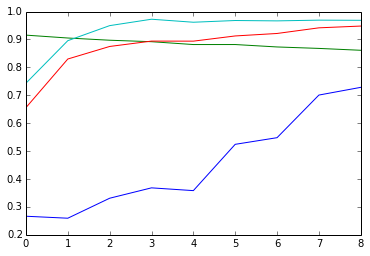

In [12]:
#=====[ Average each of num_iter runs ]=====
f = [np.average(l) for l in zip(*list(f_score))]
ft = [np.average(l) for l in zip(*list(f_score_t))]
a = [np.average(l) for l in zip(*list(accuracy))]
at = [np.average(l) for l in zip(*list(accuracy_t))]

plt.plot(f)
plt.plot(ft)
plt.plot(a)
plt.plot(at)

In [182]:
#=====[ Only use this if you wish to add to existing f1 and average scores ]=====

# avgs = pickle.load(open('Average F1-Scorea and Accuracy Squat.png','rb'))
# avgsf = avgs[0]
# avgsft = avgs[1]
# avgsa = avgs[2]
# avgsat = avgs[3]

# avgsf.append([np.average(l) for l in zip(*list(f_score))])
# avgsft.append([np.average(l) for l in zip(*list(f_score_t))])
# avgsa.append([np.average(l) for l in zip(*list(accuracy))])
# avgsat.append([np.average(l) for l in zip(*list(accuracy_t))])

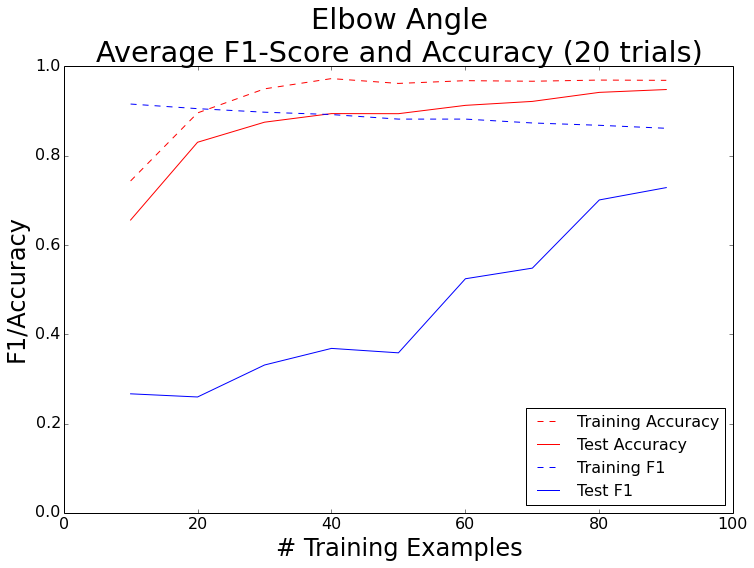

In [13]:
num_training_examples = [x*10 for x in range(1,10)]

#=====[ Plot test and training f_scores and accuracies ]====
plt.plot(num_training_examples, at, color='r', linestyle='--', label='Training Accuracy')
plt.plot(num_training_examples, a, color='r', label='Test Accuracy')
plt.plot(num_training_examples, ft, color='b', linestyle='--', label='Training F1')
plt.plot(num_training_examples, f, color='b', label='Test F1')

#=====[ Add appropriate plot decorations - preparing for saving ]=====
plt.legend(loc='lower right', prop={'size':16})
plt.title('Elbow Angle \nAverage F1-Score and Accuracy (20 trials)')
plt.xlabel('# Training Examples')
plt.ylabel('F1/Accuracy')
figure = plt.gcf() # get current figure
figure.set_size_inches(12, 8)
plt.rcParams.update({'font.size': 24})
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.axis([0, 100, 0, 1.0])
figure.savefig("elbow_angle.png", dpi = 200)

In [241]:
#=====[ Use this line if you rehydrated the average F-1 scores and accuracies and wish to update it ]====

# pickle.dump([avgsf, avgsft, avgsa, avgsat],open('Average F1-Scorea and Accuracy Squat.png','wb'))